In [1]:
%matplotlib inline
import numpy as np
import pylab as plt
import pyfits


In [30]:
header = pyfits.open('/home/iheanetu/VLA/simcassbeams/ant5RRreal.fits')[0].header

header
# for i in header:
#     print 'header[\'%s\'] = %s'%(i,header[i])

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  128                                                  
NAXIS2  =                  128                                                  
NAXIS3  =                 1024                                                  
BUNIT   = '        '                                                            
CRVAL1  =                    0                                                  
CRVAL2  =                    0                                                  
CRVAL3  =         1008000000.0                                                  
CRPIX1  =                 63.0                                                  
CRPIX2  =                 63.0                                                  
CRPIX3  =                   

(-0.5, 511.5, 511.5, -0.5)

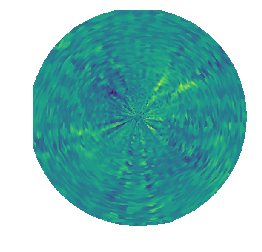

In [29]:
# data = np.load('1487813282_m000_900MHz_1MHz_500channels_Jones.npy')
data = np.load('/net/ike/home/asad/data/meerkat/beam/holography/1487813282_m000_856MHz_1MHz_857channels_Jones.npy')
dat = np.real(data[-1,1,0,:,:])
plt.figure(figsize=(6,6))
plt.imshow(dat)
plt.axis('off')

In [20]:
data.shape

(857, 2, 2, 512, 512)

In [98]:
['%s MHz'%(900+i) for i in range(500)][100]

'1000 MHz'

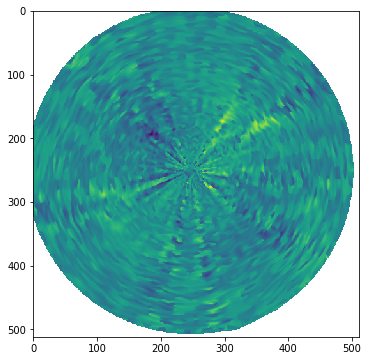

In [28]:
data[402,0,0,512//2-32:512//2+32,512//2-32:512//2+32]
dat = np.real(data[-1,1,0,:,:])# np.sqrt(np.real(data[0,0,0,:,:])**2 + np.imag(data[0,0,0,:,:])**2)


plt.figure(figsize=(6,6))
plt.imshow(dat)
# plt.figure(figsize=(16,6))
# x = np.linspace(-3,3,512)
# plt.plot(x, dat.diagonal())

In [42]:
512/2-1
nchan,nstokex,nstokey,xpl,ypl = data.shape

In [54]:
# header['SIMPLE'] = True
# header['BITPIX'] = -32
# header['NAXIS'] = 3
header['NAXIS1'] = xpl
header['NAXIS2'] = ypl
header['NAXIS3'] = nchan
# header['BUNIT'] = '        '
header['CRVAL1'] = 8.6500
header['CRVAL2'] = -0.1328
header['CRVAL3'] = 900000000.0
header['CRPIX1'] = xpl/2-1
header['CRPIX2'] = ypl/2-1
header['CRPIX3'] = 1
header['CDELT1'] = 6./xpl
header['CDELT2'] = 6./ypl
header['CDELT3'] = 1000000.0
header['CUNIT1'] = 'DEG     '
header['CUNIT2'] = 'DEG     '  
header['CUNIT3'] = 'HZ      ' 
header['CTYPE1'] = 'X       '
header['CTYPE2'] = 'Y       '
header['CTYPE3'] = 'FREQ    '
realdata = np.real(data[0,0,0,:,:]) 
imagdata = np.imag(data[0,0,0,:,:])


for pol in "RR","LR":
    for reim in "real","imag":

        hdu[pol,reim].data[ichan,:,:] = map_coordinates(dat,numpy.array(numpy.meshgrid(y,x)))

for pol in "LL","RL":
    for reim in "real","imag":
        data = hdu[pol,reim].data 



In [56]:
ls *.npy

1487813282_m000_900MHz_10MHz_53channels_Jones.npy  1487813282_m000_900MHz_1MHz_500channels_Jones.npy  1487813282_m012_900MHz_1MHz_500channels_Jones.npy  1487813282_m017_900MHz_1MHz_500channels_Jones.npy


In [ ]:
#1487813282_m000_900MHz_10MHz_53channels_Jones.npy  


In [87]:
%matplotlib inline
import numpy as np
import pylab as plt
import pyfits

# Load a sample beams header
header = pyfits.open('/home/iheanetu/VLA/simcassbeams/ant5RRreal.fits')[0].header

# files = ['1487813282_m000_900MHz_1MHz_500channels_Jones.npy', 
#          '1487813282_m012_900MHz_1MHz_500channels_Jones.npy',
#          '1487813282_m017_900MHz_1MHz_500channels_Jones.npy']

# Jone naming label dict
name = {'00':'xx','10':'yx','11':'yy','01':'xy'}

for ifname in ['m000', 'm012', 'm017']: # for each antenna

    #data = np.load('1487813282_m000_900MHz_1MHz_500channels_Jones.npy')
    fname = '1487813282_%s_900MHz_1MHz_500channels_Jones.npy'%(ifname) # input beam file name 

    print 'Start loading and processing antenna %s...\n\t\t files  %s \n'%(ifname,fname)
    data = np.load('1487813282_%s_900MHz_1MHz_500channels_Jones.npy'%(ifname)) # load beams
    nchan,nstokex,nstokey,xpl,ypl = data.shape

    # header['SIMPLE'] = True
    # header['BITPIX'] = -32
    # header['NAXIS'] = 3
    header['NAXIS1'] = xpl
    header['NAXIS2'] = ypl
    header['NAXIS3'] = nchan
    # header['BUNIT'] = '        '
    header['CRVAL1'] = 8.6500
    header['CRVAL2'] = -0.1328
    header['CRVAL3'] = 900000000.0
    header['CRPIX1'] = xpl/2-1
    header['CRPIX2'] = ypl/2-1
    header['CRPIX3'] = 1
    header['CDELT1'] = 6./xpl
    header['CDELT2'] = 6./ypl
    header['CDELT3'] = 1000000.0
    header['CUNIT1'] = 'DEG     '
    header['CUNIT2'] = 'DEG     '  
    header['CUNIT3'] = 'HZ      ' 
    header['CTYPE1'] = 'X       '
    header['CTYPE2'] = 'Y       '
    header['CTYPE3'] = 'FREQ    '
    
    print fname
    for pol in [0,0],[1,0]:# "RR","LR": # for each polarizaion in input file
        reim = ["re","im"]

        realdata = np.real(data[:,pol[0] ,pol[1],:,:])
        imagdata = np.imag(data[:,pol[0] ,pol[1],:,:])

        pyfits.writeto('1487813282_%s_%s-%s.fits'%(ifname,name['%s%s'%(pol[0],pol[1])] ,reim[0]), 
                       realdata,header=header,clobber=True)
        pyfits.writeto('1487813282_%s_%s-%s.fits'%(ifname,name['%s%s'%(pol[0],pol[1])] ,reim[1]), 
                       imagdata,header=header,clobber=True)

 
    for pol in [1,1],[0,1]:# "LL","RL": # for each polarizaion in input file
        reim = ["re","im"]

        realdata = np.real(data[:,pol[0] ,pol[1],:,:]) 
        imagdata = np.imag(data[:,pol[0] ,pol[1],:,:])

        pyfits.writeto('1487813282_%s_%s-%s.fits'%(ifname,name['%s%s'%(pol[0],pol[1])] ,reim[0]), 
                       realdata,header=header,clobber=True)
        pyfits.writeto('1487813282_%s_%s-%s.fits'%(ifname,name['%s%s'%(pol[0],pol[1])] ,reim[1]), 
                       imagdata,header=header,clobber=True)


    print 'antenna = %s\n'%ifname

print 'Done processing all antenna files!'


Start loading and processing antenna m000...
		 files1487813282_m000_900MHz_1MHz_500channels_Jones.npy 

1487813282_m000_900MHz_1MHz_500channels_Jones.npy
antenna =  m000
Start loading and processing antenna m012...
		 files1487813282_m012_900MHz_1MHz_500channels_Jones.npy 

1487813282_m012_900MHz_1MHz_500channels_Jones.npy
antenna =  m012
Start loading and processing antenna m017...
		 files1487813282_m017_900MHz_1MHz_500channels_Jones.npy 

1487813282_m017_900MHz_1MHz_500channels_Jones.npy
antenna =  m017
Done processing all antenna files!


In [ ]:
"""1487813282_m000_1711MHz_1MHz_2channels_Jones.npy   
1487813282_m012_900MHz_1MHz_521channels_Jones.npy
1487813282_m012_856MHz_1MHz_857channels_Jones.npy
1487813282_m000_856MHz_1MHz_857channels_Jones.npy 
1487813282_m017_856MHz_1MHz_857channels_Jones.npy
"""
1487813282_m012_856MHz_1MHz_857channels_Jones.npy
1487813282_m000_856MHz_1MHz_857channels_Jones.npy 
1487813282_m017_856MHz_1MHz_857channels_Jones.npy


In [17]:
%matplotlib inline
import numpy as np
import pylab as plt
import pyfits

# Load a sample beams header
header = pyfits.open('/home/iheanetu/VLA/simcassbeams/ant5RRreal.fits')[0].header

# files = ['1487813282_m000_900MHz_1MHz_500channels_Jones.npy', 
#          '1487813282_m012_900MHz_1MHz_500channels_Jones.npy',
#          '1487813282_m017_900MHz_1MHz_500channels_Jones.npy']

# Jone naming label dict
name = {'00':'xx','10':'yx','11':'yy','01':'xy'}

realdata = 0
imagdata = 0



for ifname in ['m000', 'm012', 'm017'][2:] : # for each antenna
    

    #data = np.load('1487813282_m000_900MHz_1MHz_500channels_Jones.npy')
    # fname = '1487813282_%s_900MHz_1MHz_500channels_Jones.npy'%(ifname) # input beam file name 
    fname = '/net/ike/home/asad/data/meerkat/beam/holography/1487813282_%s_856MHz_1MHz_857channels_Jones.npy'%(ifname) # input beam file name 

    print 'Start loading and processing antenna %s...\n files  %s \n'%(ifname,fname)
    #data = np.load('1487813282_%s_856MHz_1MHz_857channels_Jones.npy'%(ifname)) # load beams
    data = np.load(fname) # load beams
    nchan,nstokex,nstokey,xpl,ypl = data.shape

    # header['SIMPLE'] = True
    # header['BITPIX'] = -32
    # header['NAXIS'] = 3
    header['NAXIS1'] = xpl
    header['NAXIS2'] = ypl
    header['NAXIS3'] = nchan
    # header['BUNIT'] = '        '
    header['CRVAL1'] = 8.6500
    header['CRVAL2'] = -0.1328
    header['CRVAL3'] = 856000000.0
    header['CRPIX1'] = xpl/2-1
    header['CRPIX2'] = ypl/2-1
    header['CRPIX3'] = 1
    header['CDELT1'] = 6./xpl
    header['CDELT2'] = 6./ypl
    header['CDELT3'] = 1000000.0
    header['CUNIT1'] = 'DEG     '
    header['CUNIT2'] = 'DEG     '  
    header['CUNIT3'] = 'HZ      ' 
    header['CTYPE1'] = 'X       '
    header['CTYPE2'] = 'Y       '
    header['CTYPE3'] = 'FREQ    '
    
    print fname
    for pol in [[0,0],[1,0]][:1] :# "RR","LR": # for each polarizaion in input file
        reim = ["re","im"]

        realdata = np.real(data[:,pol[0] ,pol[1],:,:])
        imagdata = np.imag(data[:,pol[0] ,pol[1],:,:])

        pyfits.writeto('newdata/1487813282_%s_%s-%s.fits'%(ifname,name['%s%s'%(pol[0],pol[1])] ,reim[0]), 
                       realdata,header=header,clobber=True)
        pyfits.writeto('newdata/1487813282_%s_%s-%s.fits'%(ifname,name['%s%s'%(pol[0],pol[1])] ,reim[1]), 
                       imagdata,header=header,clobber=True)

 
#     for pol in [1,1],[0,1][:1]:# "LL","RL": # for each polarizaion in input file
#         reim = ["re","im"]

#         realdata = np.real(data[:,pol[0] ,pol[1],:,:]) 
#         imagdata = np.imag(data[:,pol[0] ,pol[1],:,:])

#         pyfits.writeto('newdata/1487813282_%s_%s-%s.fits'%(ifname,name['%s%s'%(pol[0],pol[1])] ,reim[0]), 
#                        realdata,header=header,clobber=True)
#         pyfits.writeto('newdata/1487813282_%s_%s-%s.fits'%(ifname,name['%s%s'%(pol[0],pol[1])] ,reim[1]), 
#                        imagdata,header=header,clobber=True)


    print 'antenna = %s\n'%ifname

print 'Done processing all antenna files!'


Start loading and processing antenna m017...
 files  /net/ike/home/asad/data/meerkat/beam/holography/1487813282_m017_856MHz_1MHz_857channels_Jones.npy 

/net/ike/home/asad/data/meerkat/beam/holography/1487813282_m017_856MHz_1MHz_857channels_Jones.npy


/home/iheanetu/vitualdrive/local/lib/python2.7/site-packages/pyfits/file.py:372: UserWarning: Overwriting existing file 'newdata/1487813282_m017_xx-re.fits'.
  warnings.warn("Overwriting existing file %r." % self.name)
/home/iheanetu/vitualdrive/local/lib/python2.7/site-packages/pyfits/file.py:372: UserWarning: Overwriting existing file 'newdata/1487813282_m017_xx-im.fits'.
  warnings.warn("Overwriting existing file %r." % self.name)


antenna = m017

Done processing all antenna files!


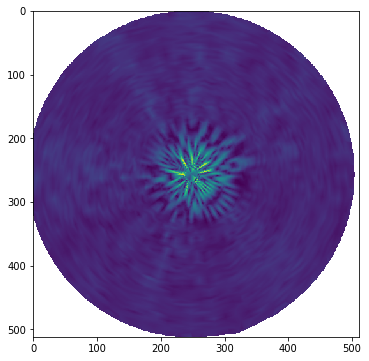

In [15]:
plt.figure(figsize=(6,6))
plt.imshow((realdata[-1,:,:]**2+imagdata[-1,:,:]**2)**.5)


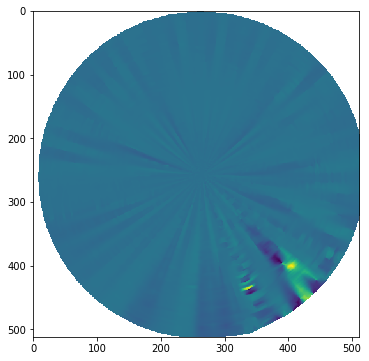

In [10]:


pols = [[0,0],[1,0]]
pol = pols[1]
dat = np.real(data[0,pol[0] ,pol[1],:,:])
plt.figure(figsize=(6,6))
plt.imshow(dat)
# plt.figure(figsize=(16,6))
# x = np.linspace(-3,3,512)
# plt.plot(x, dat.diagonal())

In [5]:
data.shape
# data[:,pol[0] ,pol[1],:,:].shape

(857, 2, 2, 512, 512)

In [85]:
data[:,pol[0] ,pol[1],:,:].T.shape,'1487813282_%s_%s-%s.fits'%(ifname,name['%s%s'%(pol[0],pol[1])] ,reim[0])

reim = ["re","im"]
reim[1]

'im'

In [76]:
name = {'RR':'00','LR':'10','LL':'11','RL':'01'}
name = {'00':'xx','10':'yx','11':'yy','01':'xy'}

for ifname in ['m000', 'm012', 'm017']:
    fname = '1487813282_%s_900MHz_1MHz_500channels_Jones.npy'%(ifname)
    #data = np.load('1487813282_m000_900MHz_1MHz_500channels_Jones.npy')
    data = np.load('1487813282_%s_900MHz_1MHz_500channels_Jones.npy'%(ifname))
    print fname
    for pol in [0,0],[1,0]:# "RR","LR":
        for reim in "re","im":

            #print '1487813282_m000_%s-%s.fits'%(name[pol],reim)
            print '1487813282_%s_%s-%s.fits'%(ifname,name['%s%s'%(pol[0],pol[1])] ,reim)
            #print '1487813282_%s_900MHz_1MHz_500channels_Jones_%s%s-%s.fits'%(fname,pol[0],pol[1] ,reim)
    print 
    for pol in [1,1],[0,1]:# "LL","RL":
        for reim in "re","im":
            #print '1487813282_m000_%s-%s.fits'%(name[pol],reim)
            #print '1487813282_m000_%s%s-%s.fits'%(pol[0],pol[1] ,reim)
            print '1487813282_%s_%s-%s.fits'%(ifname,name['%s%s'%(pol[0],pol[1])] ,reim)


1487813282_m000_900MHz_1MHz_500channels_Jones.npy
1487813282_m000_xx-re.fits
1487813282_m000_xx-im.fits
1487813282_m000_yx-re.fits
1487813282_m000_yx-im.fits

1487813282_m000_yy-re.fits
1487813282_m000_yy-im.fits
1487813282_m000_xy-re.fits
1487813282_m000_xy-im.fits
1487813282_m012_900MHz_1MHz_500channels_Jones.npy
1487813282_m012_xx-re.fits
1487813282_m012_xx-im.fits
1487813282_m012_yx-re.fits
1487813282_m012_yx-im.fits

1487813282_m012_yy-re.fits
1487813282_m012_yy-im.fits
1487813282_m012_xy-re.fits
1487813282_m012_xy-im.fits
1487813282_m017_900MHz_1MHz_500channels_Jones.npy
1487813282_m017_xx-re.fits
1487813282_m017_xx-im.fits
1487813282_m017_yx-re.fits
1487813282_m017_yx-im.fits

1487813282_m017_yy-re.fits
1487813282_m017_yy-im.fits
1487813282_m017_xy-re.fits
1487813282_m017_xy-im.fits


'1487813282_m000_00-re.fits\n1487813282_m000_00-im.fits\n1487813282_m000_10-re.fits\n1487813282_m000_10-im.fits'

In [ ]:
for pol in "RR","LR":
    for reim in "real","imag":

        hdu[pol,reim].data[ichan,:,:] = map_coordinates(dat,numpy.array(numpy.meshgrid(y,x)))

for pol in "LL","RL":
    for reim in "real","imag":
        data = hdu[pol,reim].data 


In [ ]:
import ephem
az  = -35.000262416  #deg
el  = 51.0910024663 #deg
lat = -30.7214 #deg
lon = 21.4106 #deg
alt = 1038  # m

date =  "2017/02/23 03:28:04.182" # '2000/01/01 12:00:00' 
meerkat_observer = ephem.Observer()
meerkat_observer.lon = lon  
meerkat_observer.lat = lat  
meerkat_observer.elevation = alt
meerkat_observer.date = date
meerkat_observer.epoch = ephem.J2000
print meerkat_observer.radec_of(az, el)

In [ ]:
/home/narh/MEERKAT_HOLOBEAMS/meerkatholo/holobm1/1487813282_m00_900MHz_1MHz_500channels_Jones_XX_im.fits

In [2]:
%matplotlib inline
import pylab as plt
import gaussfitsutil as ut
import cPickle,numpy,sys,os,pyfits,scipy
import numpy as np

plotchan = [500]
clip = 0.20

cachefile = 'beamfits-mearkat-clip-%s.cp'%clip

#fileReal = '/home/narh/OSKAR-SIM/OSKAR_Simulation/TR1024/TR1024/k7_tru_sim_results/tru_beam__jones_S0000_XX_re.fits'
#fileImag = '/home/narh/OSKAR-SIM/OSKAR_Simulation/TR1024/TR1024/k7_tru_sim_results/tru_beam__jones_S0000_XX_im.fits'
xx = {}
yy = {}
#for ifname in ['m000', 'm012', 'm017']:
for ifname in ['00', '12', '17']:
    
    path = '/home/narh/MEERKAT_HOLOBEAMS/meerkatholo/holobm1/'

    #fileReal = 'newdata/1487813282_m0%s_xx-re.fits'%ifname
    #fileImag = 'newdata/1487813282_m0%s_xx-im.fits'%ifname
    fileReal = path + '1487813282_m%s_900MHz_1MHz_500channels_Jones_XX_re.fits'%ifname
    fileImag = path + '1487813282_m%s_900MHz_1MHz_500channels_Jones_XX_im.fits'%ifname
    xx[ifname]  = ut.get2DGaussFitParams3(fileReal,fileImag,plotchan=plotchan,clip=clip)
    cPickle.dump(xx[ifname],file('newdata/1487813282_m0%s_XX.cp'%ifname,'w'),2)
    
    #fileReal = 'newdata/1487813282_m0%s_yy-re.fits'%ifname
    #fileImag = 'newdata/1487813282_m0%s_yy-im.fits'%ifname
    fileReal = path + '1487813282_m%s_900MHz_1MHz_500channels_Jones_YY_re.fits'%ifname
    fileImag = path + '1487813282_m%s_900MHz_1MHz_500channels_Jones_YY_im.fits'%ifname
    yy[ifname]  = ut.get2DGaussFitParams3(fileReal,fileImag,plotchan=plotchan,clip=clip)
    cPickle.dump(yy[ifname],file('1487813282_m%s_YY.cp'%ifname,'w'),2)
    
cPickle.dump((xx,yy),file(cachefile,'w'))
print '\nDone !!!\n'

ImportError: No module named scipy

In [ ]:
fig = plt.figure(figsize=(40,96))
for iant,ant in enumerate(ANTENNAS):
    r,l = rr[ant], ll[ant]
    plt.subplot(12,2,iant*2+1)
    plt.title("Antenna %s RR FWHM"%ant)    
    plt.plot(r.freq,r.yw,RRY,label='%s RR yw'%ant)
    plt.plot(r.freq,r.xw,RRX,label='%s RR xw'%ant)
    plt.plot(sr.freq,sr.xw,SRRX,label='sim RR xw')
    plt.plot(sr.freq,sr.yw,SRRY,label='sim RR yw')
    plt.xlim(r.freq0[0],r.freq0[-1])
    plt.ylim(r.xw.min(),r.xw.max())
    plt.ylabel("FWHM, degrees")
    plt.legend(loc='upper right')
    plt.subplot(12,2,iant*2+2)
    plt.title("Antenna %s LL FWHM"%ant)    
    plt.plot(l.freq,l.yw,LLY,label='%s LL yw'%ant)
    plt.plot(l.freq,l.xw,LLX,label='%s LL yw'%ant)
    plt.plot(sl.freq,sl.xw,SLLX,label='sim LL xw')
    plt.plot(sl.freq,sl.yw,SLLY,label='sim LL yw')
    plt.xlim(l.freq0[0],l.freq0[-1])
    plt.ylim(r.yw.min(),r.yw.max())
    plt.ylabel("FWHM, degrees")    
    plt.legend(loc='upper right')
plt.savefig("plot-sizes%s.png"%LABEL,dpi=75)

['widthGxH', 'widthGxV', 'widthGyH', 'widthGyV', 'offsetGxH', 'offsetGxV', 'offsetGyH', 'offsetGyV']
['widthGxH', 'widthGxV', 'widthGyH', 'widthGyV', 'offsetGxH', 'offsetGxV', 'offsetGyH', 'offsetGyV']
['widthGxH', 'widthGxV', 'widthGyH', 'widthGyV', 'offsetGxH', 'offsetGxV', 'offsetGyH', 'offsetGyV']


/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:5: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:5: RuntimeWarning: invalid value encountered in less_equal
/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:6: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:6: RuntimeWarning: invalid value encountered in less_equal
/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:7: RuntimeWarning: invalid value encountered in less_equal
/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:8: RuntimeWarning: invalid value encountered in less_equal


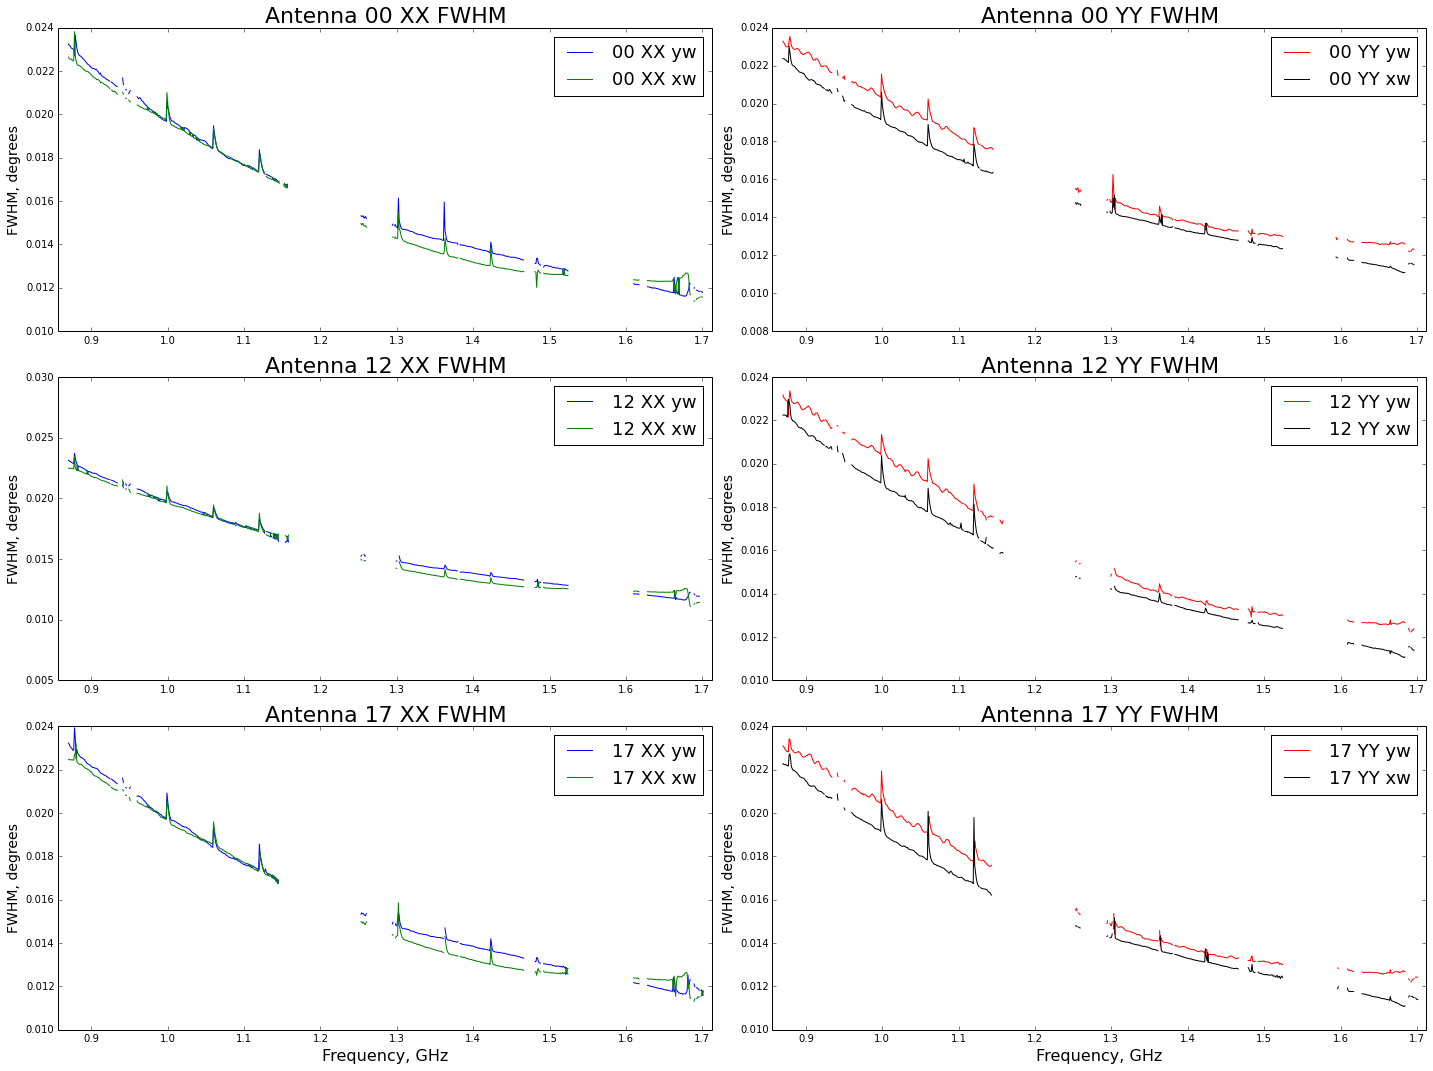

In [201]:
xx,yy = cPickle.load(file(cachefile))
ANTENNAS = xx.keys()
VAR_THRESHOLD = .03
for iant,ant in enumerate(ANTENNAS):
    xx[ant].set_mask((xx[ant].var>VAR_THRESHOLD)|(xx[ant].var<=0))
    yy[ant].set_mask((yy[ant].var>VAR_THRESHOLD)|(yy[ant].var<=0))
    xx[ant].var[xx[ant].var<=0] = 0
    yy[ant].var[yy[ant].var<=0] = 0
# some other constants
NCHAN = len(xx['00'].freq0)
FREQS = xx['00'].freq0[0],xx['00'].freq0[-1]

# for ant in xx.keys()[:1]: # ['00', '12', '17'][1:2] :
#     VAR_THRESHOLD = 0.03
#     xx[ant].set_mask((xx[ant].var>VAR_THRESHOLD)|(xx[ant].var<=0))
#     # xx[ant].set_mask((xx[ant].var>VAR_THRESHOLD)|(xx[ant].var<=0))
#     xx[ant].var[xx[ant].var<=0] = 0
#     # xx[ant].var[xx[ant].var<=0] = 0

#     plt.figure(figsize=(16,10))
#     plt.subplot(2,1,1)
#     plt.plot(xx[ant].xw)
#     plt.plot(xx[ant].yw)
#     plt.ylim(1.2,2.3)
#     plt.subplot(2,1,2)
#     plt.plot(xx[ant].x0)
#     # plt.plot(xx[ant].y0)
#     # plt.ylim(-35,5)# 
#     plt.ylim(8.6,8.7)

freq = [(856 +i)*0.001 for i in range(nchan)]
plt.figure(figsize=(20,15))
for iant,ant in enumerate(ANTENNAS):
    r,l = xx[ant], yy[ant]
    plt.subplot(3,2,iant*2+1)
    plt.title("Antenna %s XX FWHM"%ant,fontsize=22)    
#     plt.plot(r.freq,r.yw,label='%s XX yw'%ant)
#     plt.plot(r.freq,r.xw,label='%s XX xw'%ant)
    plt.plot(freq,r.yw/100,label='%s XX yw'%ant)
    plt.plot(freq,r.xw/100,label='%s XX xw'%ant)
    plt.xlim(freq[0],freq[-1])
#     plt.ylim(r.xw.min(),r.xw.max())
    #plt.ylim(1.2,2.3)
    plt.ylabel("FWHM, degrees",fontsize=14)
    plt.legend(loc='upper right',fontsize=18)
    if ant == xx.keys()[-1]:plt.xlabel("Frequency, GHz",fontsize=16)
    plt.subplot(3,2,iant*2+2)
    plt.title("Antenna %s YY FWHM"%ant,fontsize=22)    
    plt.plot(freq,l.yw/100,'r',label='%s YY yw'%ant)
    plt.plot(freq,l.xw/100,'k',label='%s YY xw'%ant)
    plt.xlim(freq[0],freq[-1])
#     plt.ylim(r.yw.min(),r.yw.max())
    plt.ylabel("FWHM, degrees",fontsize=14)    
    plt.legend(loc='upper right',fontsize=18)
    if ant == yy.keys()[-1]:plt.xlabel("Frequency, GHz",fontsize=16)
    plt.tight_layout()
# plt.savefig("newdata/plot-meerkat-holography-beams-sizes%s.png"%ant,dpi=75)

In [42]:
freq = [(900 +i)*0.001 for i in range(500)]
freq[-1]

1.399

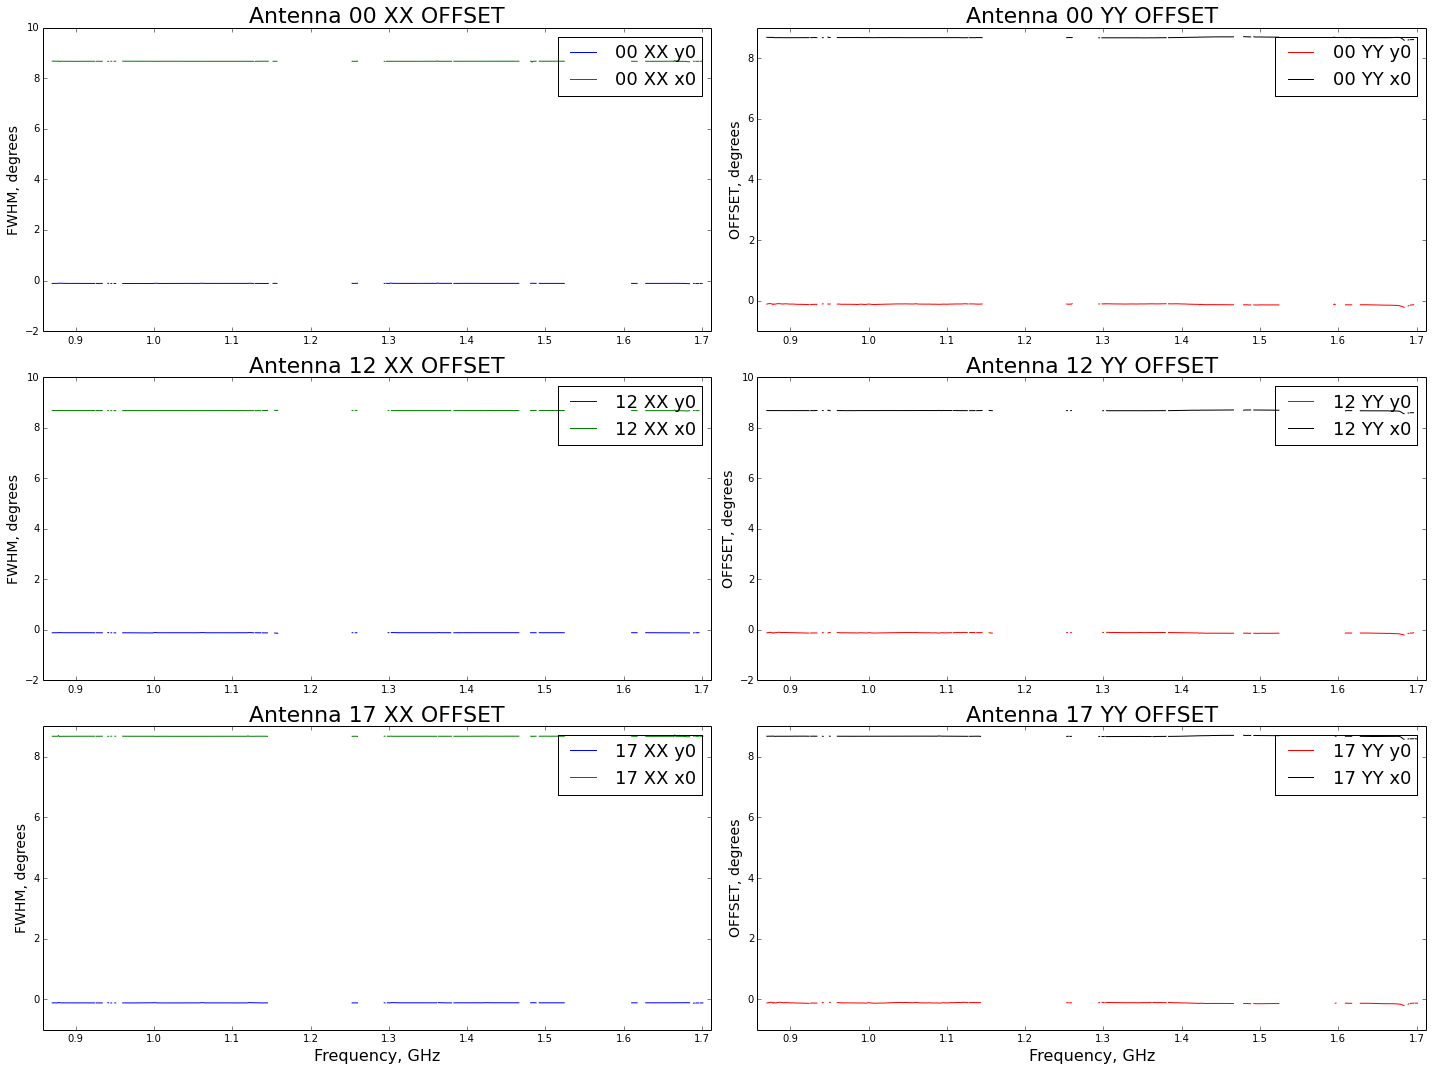

In [72]:
plt.figure(figsize=(20,15))
for iant,ant in enumerate(ANTENNAS):
    r,l = xx[ant], yy[ant]
    plt.subplot(3,2,iant*2+1)
    plt.title("Antenna %s XX OFFSET"%ant,fontsize=22)    
    plt.plot(freq,r.y0,label='%s XX y0'%ant)
    plt.plot(freq,r.x0,label='%s XX x0'%ant)
    plt.xlim(freq[2],freq[-1])
#     plt.ylim(r.xw.min(),r.xw.max())
#     plt.ylim(1.2,2.3)
    plt.ylabel("FWHM, degrees",fontsize=14)
    plt.legend(loc='upper right',fontsize=18)
    if ant == xx.keys()[-1]:plt.xlabel("Frequency, GHz",fontsize=16)
    plt.subplot(3,2,iant*2+2)
    plt.title("Antenna %s YY OFFSET"%ant,fontsize=22)    
    plt.plot(freq,l.y0,'r',label='%s YY y0'%ant)
    plt.plot(freq,l.x0,'k',label='%s YY x0'%ant)
    plt.xlim(freq[2],freq[-1])
#     plt.ylim(r.yw.min(),r.yw.max())
    plt.ylabel("OFFSET, degrees",fontsize=14)    
    plt.legend(loc='upper right',fontsize=18)
    if ant == yy.keys()[-1]:plt.xlabel("Frequency, GHz",fontsize=16)
    plt.tight_layout()
# plt.savefig("plot-meerkat-holography-beams-Offset%s.png"%ant,dpi=75)

In [12]:
import cPickle,pylab as plt
import gaussfitsutil
with open('/home/iheanetu/meerkat_beams/holography/beamfits-mearkat-clip-0.2.cp', 'rb') as input:
        xx,yy = cPickle.load(input)

for ant in xx.keys()[:1]: # ['00', '12', '17'][1:2] :
    VAR_THRESHOLD = 0.03
    #ant = '00'
    xx[ant].set_mask((xx[ant].var>VAR_THRESHOLD)|(xx[ant].var<=0))
    # xx[ant].set_mask((xx[ant].var>VAR_THRESHOLD)|(xx[ant].var<=0))
    xx[ant].var[xx[ant].var<=0] = 0
    # xx[ant].var[xx[ant].var<=0] = 0

    plt.figure(figsize=(16,10))
    plt.subplot(2,1,1)
    plt.plot(xx[ant].xw)
    plt.plot(xx[ant].yw)
#     plt.ylim(1.2,2.3)
    plt.subplot(2,1,2)
    plt.plot(xx[ant].x0)
    # plt.plot(xx[ant].y0)
    # plt.ylim(-35,5)# 
#     plt.ylim(8.6,8.7)




ImportError: No module named scipy

In [179]:
# newdata = np.loadtxt('1487813282_m012_856MHz_1MHz_857channels_Jones.txt',str)
# newdata
# [np.float(ii.replace(',', '')) for ii in i for i in newdata[1]][:3]
# /net/ike/home/asad/data/meerkat/beam/holography/
import csv
newdata = {}

for ant in ['00','12','17']:   
    ndata = []    
    count = 0
    #with open('newdata/1487813282_m0%s_856MHz_1MHz_857channels_Jones.txt'%ant, 'rb') as csvfile:
    with open(
        '/net/ike/home/asad/data/meerkat/beam/holography/1487813282_m0%s_856MHz_1MHz_857channels_Jones.txt'%ant,
        'rb') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
        for row in spamreader :        
            if count != 0: ndata.append([float(i.replace(',','')) for i in row])#print [float(i.replace(',','')) for i in row]
            if count == 0: count = 1; print [i.replace(',','') for i in row]
        newdata[ant] = np.array(ndata)
        

['widthGxH', 'widthGxV', 'widthGyH', 'widthGyV', 'offsetGxH', 'offsetGxV', 'offsetGyH', 'offsetGyV']
['widthGxH', 'widthGxV', 'widthGyH', 'widthGyV', 'offsetGxH', 'offsetGxV', 'offsetGyH', 'offsetGyV']
['widthGxH', 'widthGxV', 'widthGyH', 'widthGyV', 'offsetGxH', 'offsetGxV', 'offsetGyH', 'offsetGyV']


In [180]:
#['widthGxH', 'widthGxV', 'widthGyH', 'widthGyV', 'offsetGxH', 'offsetGxV', 'offsetGyH', 'offsetGyV']
t = ['widthGxH', 'widthGxV', 'widthGyH', 'widthGyV', 'offsetGxH', 'offsetGxV', 'offsetGyH', 'offsetGyV']
t = np.array(t)
t[1::2]
for ant in ['00','12','17']:
    print newdata[ant].shape


(857, 8)
(857, 8)
(857, 8)


In [175]:
newdata[ant].shape

(0,)

In [193]:
np.ma.masked_where(np.ma.getmask(r.xw),)

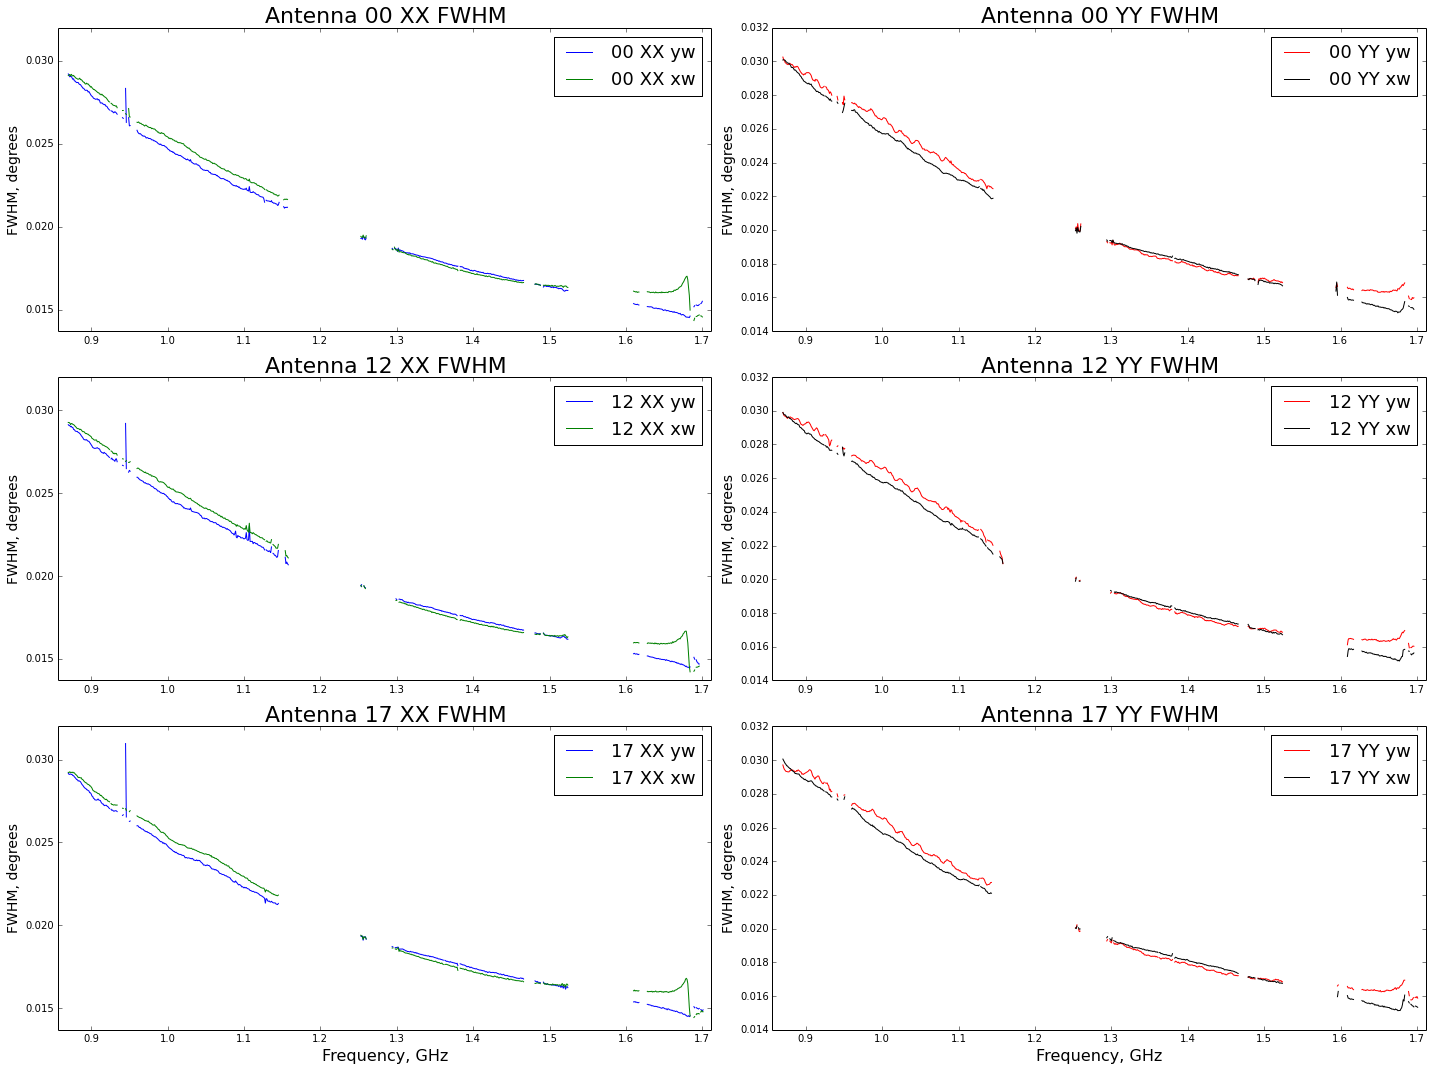

In [198]:
freq = [(856 +i)*0.001 for i in range(nchan)]
plt.figure(figsize=(20,15))
for iant,ant in enumerate(ANTENNAS):
    rant,lant = newdata[ant][:,0::2],newdata[ant][:,1::2] #xx[ant], yy[ant]
    r,l = xx[ant], yy[ant]

    # create a fitted beam parameter class object - to hold the data for new interpolated beams
    rbeams = ut.FittedBeamParm(nchan)
    lbeams = ut.FittedBeamParm(nchan)

    # Performing a least-square fit on the behavior of the FWHM and obtain fitted parameters
    rbeams.xw = np.ma.masked_array(rant[:,0],np.ma.getmask(r.xw)) #rant[:,0]
    lbeams.xw = np.ma.masked_array(lant[:,0],np.ma.getmask(l.xw)) #lant[:,0]

    rbeams.yw = np.ma.masked_array(rant[:,1],np.ma.getmask(r.xw)) #rant[:,1]
    lbeams.yw = np.ma.masked_array(lant[:,1],np.ma.getmask(l.xw)) #lant[:,1]

    rbeams.x0 = np.ma.masked_array(rant[:,2],np.ma.getmask(r.xw)) #rant[:,2]
    lbeams.x0 = np.ma.masked_array(lant[:,2],np.ma.getmask(l.xw)) #lant[:,2]
    
    rbeams.y0 = np.ma.masked_array(rant[:,3],np.ma.getmask(r.xw)) #rant[:,3]
    lbeams.y0 = np.ma.masked_array(lant[:,3],np.ma.getmask(l.xw)) #lant[:,3]
    
#     VAR_THRESHOLD = .03
# #     for icant,cant in enumerate(ANTENNAS):
#     rbeams.set_mask((r.var>VAR_THRESHOLD)|(r.var<=0))
#     lbeams.set_mask((l.var>VAR_THRESHOLD)|(l.var<=0))
#     rbeams.var[r.var<=0] = 0
#     lbeams.var[l.var<=0] = 0

    plt.subplot(3,2,iant*2+1)
    plt.title("Antenna %s XX FWHM"%ant,fontsize=22)    
#     plt.plot(r.freq,r.yw,label='%s XX yw'%ant)
#     plt.plot(r.freq,r.xw,label='%s XX xw'%ant)
#     plt.plot(freq,r[:,2],label='%s XX yw'%ant)
#     plt.plot(freq,r[:,0],label='%s XX xw'%ant)
    plt.plot(freq,rbeams.yw,label='%s XX yw'%ant)
    plt.plot(freq,rbeams.xw,label='%s XX xw'%ant)
    plt.xlim(freq[0],freq[-1])
#     plt.ylim(r.xw.min(),r.xw.max())
#     plt.ylim(1.2,2.3)
    plt.ylim(0.0137,.032)
    plt.ylabel("FWHM, degrees",fontsize=14)
    plt.legend(loc='upper right',fontsize=18)
    if ant == xx.keys()[-1]:plt.xlabel("Frequency, GHz",fontsize=16)
    plt.subplot(3,2,iant*2+2)
    plt.title("Antenna %s YY FWHM"%ant,fontsize=22)    
#     plt.plot(freq,l[:,3],'r',label='%s YY yw'%ant)
#     plt.plot(freq,l[:,1],'k',label='%s YY xw'%ant)
    plt.plot(freq,lbeams.yw,'r',label='%s YY yw'%ant)
    plt.plot(freq,lbeams.xw,'k',label='%s YY xw'%ant)
    plt.xlim(freq[0],freq[-1])
#     plt.ylim(r.yw.min(),r.yw.max())
    plt.ylim(0.014,.032)
    plt.ylabel("FWHM, degrees",fontsize=14)    
    plt.legend(loc='upper right',fontsize=18)
    if ant == yy.keys()[-1]:plt.xlabel("Frequency, GHz",fontsize=16)
    plt.tight_layout()
# plt.savefig("newdata/plot-meerkat-holography-beams-sizes%s.png"%ant,dpi=75)

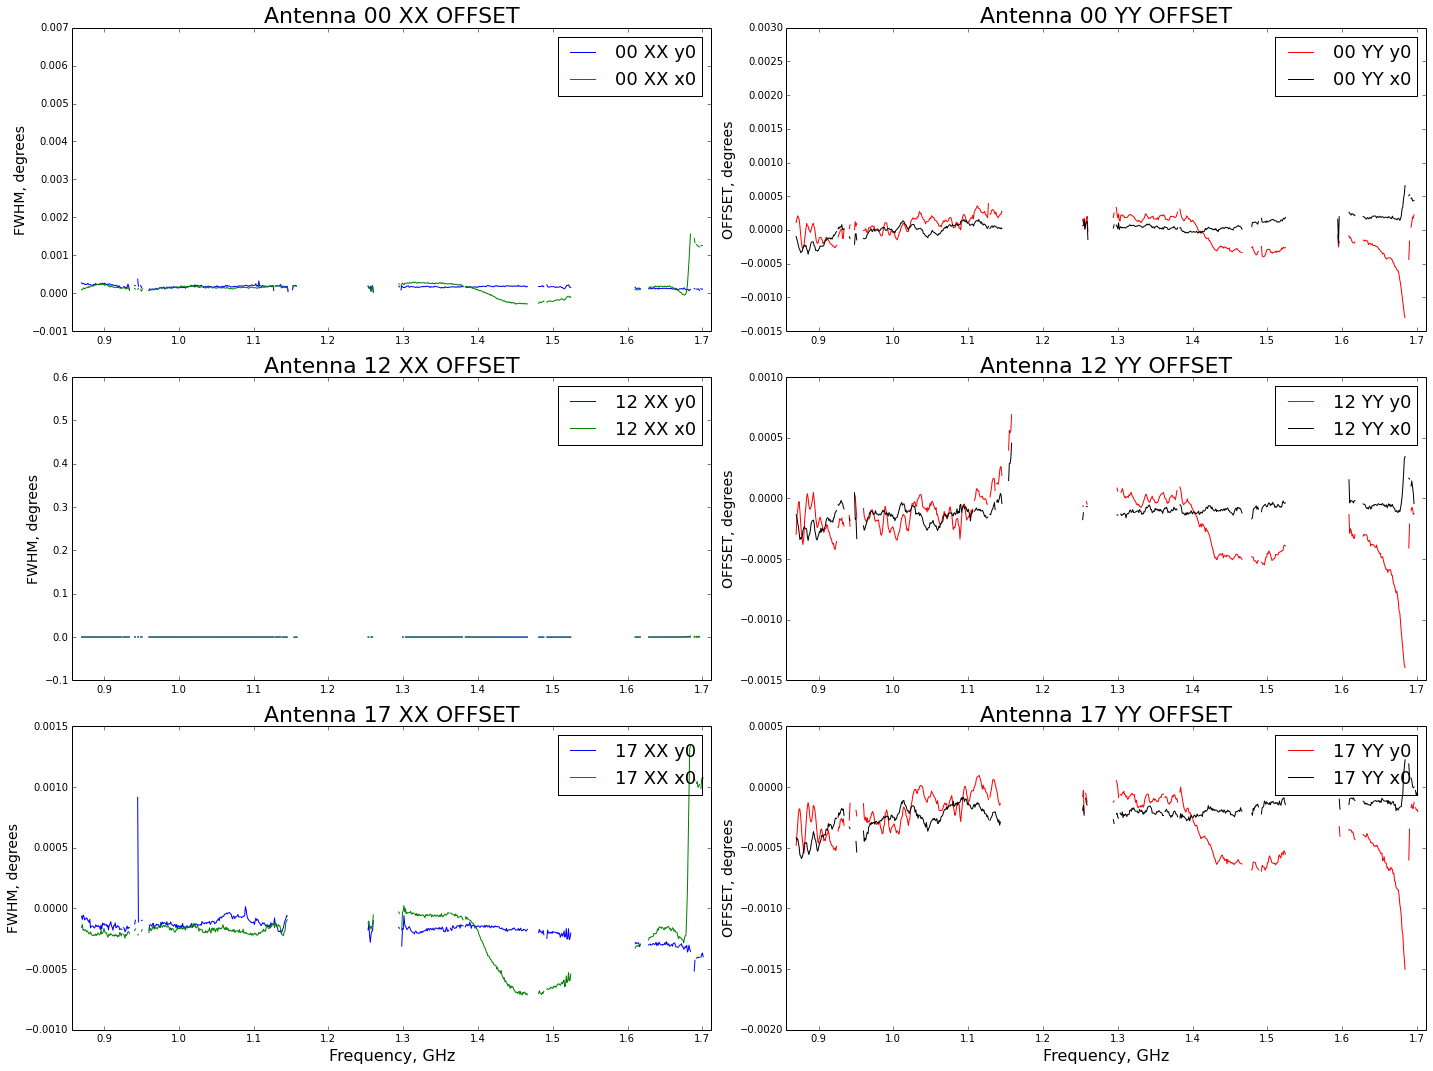

In [204]:
plt.figure(figsize=(20,15))
for iant,ant in enumerate(ANTENNAS):
    #r,l = xx[ant], yy[ant]
    rant,lant = newdata[ant][:,0::2],newdata[ant][:,1::2] #
    r,l = xx[ant], yy[ant]

    # create a fitted beam parameter class object - to hold the data for new interpolated beams
    rbeams = ut.FittedBeamParm(nchan)
    lbeams = ut.FittedBeamParm(nchan)

    # Performing a least-square fit on the behavior of the FWHM and obtain fitted parameters
    rbeams.xw = np.ma.masked_array(rant[:,0],np.ma.getmask(r.xw)) #rant[:,0]
    lbeams.xw = np.ma.masked_array(lant[:,0],np.ma.getmask(l.xw)) #lant[:,0]

    rbeams.yw = np.ma.masked_array(rant[:,1],np.ma.getmask(r.xw)) #rant[:,1]
    lbeams.yw = np.ma.masked_array(lant[:,1],np.ma.getmask(l.xw)) #lant[:,1]

    rbeams.x0 = np.ma.masked_array(rant[:,2],np.ma.getmask(r.xw)) #rant[:,2]
    lbeams.x0 = np.ma.masked_array(lant[:,2],np.ma.getmask(l.xw)) #lant[:,2]
    
    rbeams.y0 = np.ma.masked_array(rant[:,3],np.ma.getmask(r.xw)) #rant[:,3]
    lbeams.y0 = np.ma.masked_array(lant[:,3],np.ma.getmask(l.xw)) #lant[:,3]

    plt.subplot(3,2,iant*2+1)
    plt.title("Antenna %s XX OFFSET"%ant,fontsize=22)    
    plt.plot(freq,rbeams.y0,label='%s XX y0'%ant)
    plt.plot(freq,rbeams.x0,label='%s XX x0'%ant)
    plt.xlim(freq[1],freq[-1])
#     plt.ylim(r.xw.min(),r.xw.max())
#     plt.ylim(1.2,2.3)
    plt.ylabel("FWHM, degrees",fontsize=14)
    plt.legend(loc='upper right',fontsize=18)
    if ant == xx.keys()[-1]:plt.xlabel("Frequency, GHz",fontsize=16)
    plt.subplot(3,2,iant*2+2)
    plt.title("Antenna %s YY OFFSET"%ant,fontsize=22)    
    plt.plot(freq,lbeams.y0,'r',label='%s YY y0'%ant)
    plt.plot(freq,lbeams.x0,'k',label='%s YY x0'%ant)
    plt.xlim(freq[1],freq[-1])
#     plt.ylim(r.yw.min(),r.yw.max())
    plt.ylabel("OFFSET, degrees",fontsize=14)    
    plt.legend(loc='upper right',fontsize=18)
    if ant == yy.keys()[-1]:plt.xlabel("Frequency, GHz",fontsize=16)
    plt.tight_layout()
# plt.savefig("plot-meerkat-holography-beams-Offset%s.png"%ant,dpi=75)

In [153]:
np.array(ndata).shape,len(freq),len(rbeams.yw),newdata[ant][0::2].shape

((857, 8), 857, 429, (429, 8))

In [202]:
# np.ma.masked_array(rant[:,0],np.ma.getmask(r.xw))

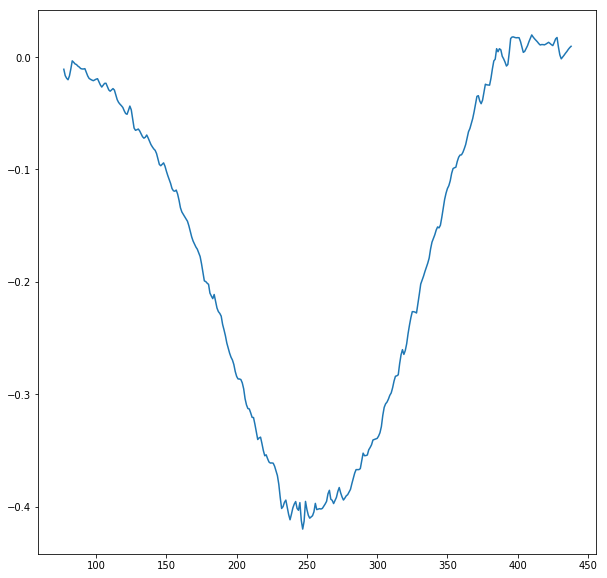

In [8]:
%matplotlib inline
import pylab as plt
import pyfits
data = pyfits.open(
    '/home/narh/MEERKAT_HOLOBEAMS/meerkatholo/holobm1/1487813282_m017_900MHz_1MHz_500channels_Jones_YY_im.fits')[0].data

plt.figure(figsize=(10,10))
#plt.imshow(data[1,:,:])
plt.plot(data[1,:,:].diagonal())
# plt.axis('off')
# plt.

In [5]:
data.shape

(500, 512, 512)